In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Defining Exact Solution

In [3]:
def true_value(x):
    d=0.5
    sigma_a=0.4
    s=1
    L=np.sqrt(d/sigma_a)
    exp=torch.exp(-x/L)
    func=(s*L)/(2*d)*exp
    return func

tensor([[4.5710e-01],
        [4.2140e-01],
        [3.8849e-01],
        [3.5815e-01],
        [3.3019e-01],
        [3.0440e-01],
        [2.8063e-01],
        [2.5871e-01],
        [2.3851e-01],
        [2.1988e-01],
        [2.0271e-01],
        [1.8688e-01],
        [1.7229e-01],
        [1.5883e-01],
        [1.4643e-01],
        [1.3499e-01],
        [1.2445e-01],
        [1.1473e-01],
        [1.0577e-01],
        [9.7512e-02],
        [8.9897e-02],
        [8.2877e-02],
        [7.6405e-02],
        [7.0438e-02],
        [6.4937e-02],
        [5.9866e-02],
        [5.5191e-02],
        [5.0881e-02],
        [4.6907e-02],
        [4.3244e-02],
        [3.9867e-02],
        [3.6754e-02],
        [3.3884e-02],
        [3.1237e-02],
        [2.8798e-02],
        [2.6549e-02],
        [2.4476e-02],
        [2.2564e-02],
        [2.0802e-02],
        [1.9178e-02],
        [1.7680e-02],
        [1.6299e-02],
        [1.5026e-02],
        [1.3853e-02],
        [1.2771e-02],
        [1

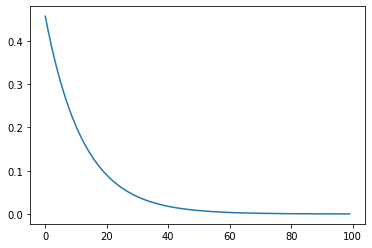

In [4]:
torch.manual_seed(123)
x=torch.linspace(1,10,100).view(-1,1)
result=true_value(x)
print(result)
plt.plot(result)

In [5]:

class FCN(nn.Module):
    "Defines a fully-connected network in PyTorch"
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

tensor(1.0626, grad_fn=<PowBackward0>) tensor(0.0005, grad_fn=<MeanBackward0>)


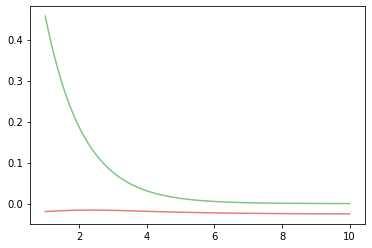

tensor(6.2670e-12, grad_fn=<PowBackward0>) tensor(3.3913e-07, grad_fn=<MeanBackward0>)


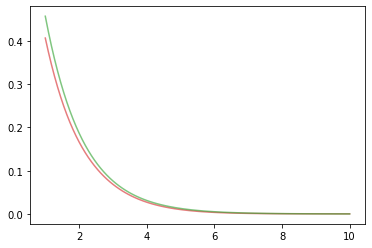

tensor(1.8468e-10, grad_fn=<PowBackward0>) tensor(5.8645e-09, grad_fn=<MeanBackward0>)


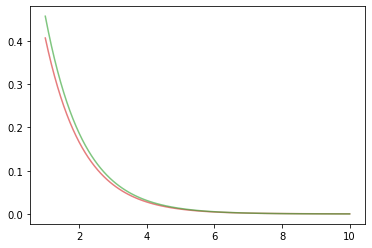

tensor(1.5242e-09, grad_fn=<PowBackward0>) tensor(5.4946e-09, grad_fn=<MeanBackward0>)


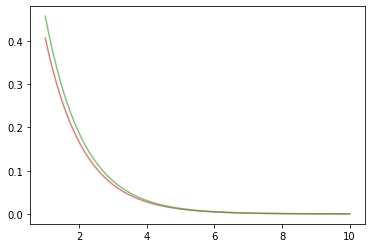

tensor(4.9854e-08, grad_fn=<PowBackward0>) tensor(1.0692e-07, grad_fn=<MeanBackward0>)


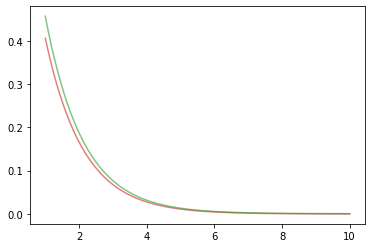

tensor(4.4565e-11, grad_fn=<PowBackward0>) tensor(4.0163e-10, grad_fn=<MeanBackward0>)


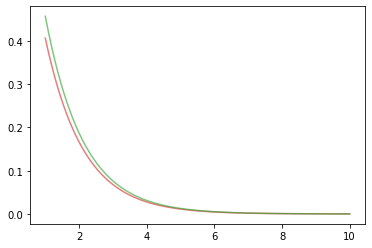

tensor(4.2676e-09, grad_fn=<PowBackward0>) tensor(2.3613e-09, grad_fn=<MeanBackward0>)


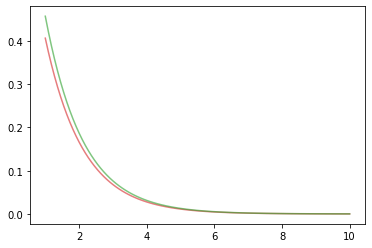

In [7]:
torch.manual_seed(123)

pinn= FCN(1,1,32,6)

x_boundary=torch.tensor(0.).view(-1,1).requires_grad_(True)
x_train= torch.linspace(0,100,200).view(-1,1).requires_grad_(True)
d=0.5
sigma_a=0.4
s=1
L=np.sqrt(d/sigma_a)
optimiser=torch.optim.Adam(pinn.parameters(),lr=1e-4)
for i in range(30001):
    optimiser.zero_grad()
    u=pinn(x_boundary)
    dudx=torch.autograd.grad(u,x_boundary,torch.ones_like(u),create_graph=True)[0]
    loss1=torch.squeeze((u-1))**2

    u=pinn(x_train)
    dudx=torch.autograd.grad(u,x_train,torch.ones_like(u),create_graph=True)[0]
    d2udx2=torch.autograd.grad(dudx,x_train,torch.ones_like(u),create_graph=True)[0]

    loss2=torch.mean((d2udx2-(u/(L**2)))**2)

    loss=loss1+ loss2
    loss.backward()
    optimiser.step()

    if i%5000 ==0:
        u=pinn(x).detach()
        print(loss1,loss2)
        plt.plot(x,u,label="PINN",color="tab:red",alpha=0.6)
        plt.plot(x,result,label="Exact Solution",color="tab:green",alpha=0.6)
        plt.show()

